# Forecasting: Principles and Practice
https://www.otexts.org/fpp

In [4]:
%%html
<style>
table {float:left}
</style>

### Frequently used characters

| symbol | definition |
|--------|------------|
| $\hat{y}$ | avg value of forecast distribution |
| $\bar{y}$ | sample mean of $Y$ |
| $N$ or $T$ | total number of observations |

## Chapter 1 - Getting Started

The predictability of an event or a quantity depends on several factors including:

1. how well we understand the factors that contribute to it
    - electricity demand is known to depend on time of day, population, etc.
2. how much data are available
3. whether the forecasts can affect the thing we are trying to forecast
    - part of the self-fulfilling prophecy, for any well-published forecasts that predict a stock to increase, e.g., people will adjust the cost of that stock to fulfill the prediction
    
The appropriate forecast method depends on data availability. If no data are available, **qualitative forecasts** are used. These forecasts consider trade expert opinions and other word-of-mouth, qualitative data to forecast.
    
**Cross-sectional forecasting**: the intent with this kind of forecast is to predict the value of something that has not directly been observed. e.g., the price of a house in an area that was not included in our data set.

These models are used when the variable to be forecast have a relationship with one ore more predictor variables.

Machine learning can often be used for this type of prediction.

**Time series forecasting**: this forecast is used for something that changes or exhibits a patterned behavior over time. e.g., sales figures.

*Notation*: 
1. for cross-sectional data, we will use subscript $i$ to indicate a specific obervation (e.g., $y_i$ will denote the $i$th observation in a data set).
2. we will use $N$ to denote the total number of observations in the cross-sectional data set.
3. for time series data, we use subscript $t$ instead of $i$.
4. we will use $T$ to denote the total number of observations in a time series.

### The basic steps in a forecasting task

1. Problem definition
    - what will the forecast be used for? who will use it? etc.
2. Gathering information
    - there are always at least two kinds of information required:
        1. statistical data
        2. the accumulated expertise of the people who collect the data and use the forecasts
3. Preliminary (exploratory) analysis
    - graph the data. look for patterns or trends or seasonality. are there cycles? outliers?
4. Choosing and fitting models
    - "Each model is itself an artificial construct that is based on a set of assumptions (explicit and implicit)"
5. Using and evaluating the model(s)
    - forecast! and evaluate
    
### The statistical forecasting perspective

The thing we are trying to forecast is unknown (or we wouldn't be forecasting it), so we can think of it as a **random variable**. e.g., the total sales next month could take a range of possible values and we won't know the actual value until we add up the sales next month.

The further ahead we forecast, the more uncertain we are.

When we forecast, we are taking the *middle* value of the range of possible values. Often times, a **prediction interval** is given.

A forecast is always based on some observations. Suppose we denote all the information we have observed as $I$ and want to forecast $y_i$. We then write $y_i|I$ meaning "the random variable $y_i$ given what we know in $I$". The set of values this random variable could take, along with their relative probabilities, is know as the **probability distribution** of $y_i|I$. In forecasting, we call this the **forecast distribution**. When we say "the forecast", we generally mean the average value of the forecast distribution, denoted as $\hat{y}$. Thus, we write the forecast of $y_i$ as $\hat{y}_i$, meaning the average of the possible values that $y_i$ could take. Occasionally, we use $\hat{y}_i$ as the median of the forecast distribution.

With time series forecasting, it's often useful to specify what exact information we have used in calculating the forecast. For example, we write $\hat{y}_{t|t-1}$ to mean the forecast of $y_t$ taking into account all of the previous observations ($y_1$, ..., $y_{t-1}$). Similarly, $\hat{y}_{T+h|T}$ means the forecast of $y_{T+h}$ taking account of $y_1$, ..., $y_T$ (where an $h$-step forecast taking account of all observations up to time $T$).



## Chapter 2 - The Forecaster's Toolbox

A **trend** exists when there is a long-term increase or decrease in the data.    
A **seasonal** pattern occurs when a time series is affected by seasonal factors, such as time of year or day of the week.    
A **cycle** occurs when the data exhibit rises and falls that are not of a fixed period.    

### Bivariate Statistics

The most commonly used bivariate statistic is the **correlation coefficient**. It measures the strength of the relationship between two variables and can be written as:

$$ r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2} \sqrt{\sum (y_i - \bar{y})^2}} $$

where the first variable is denoted as $x$ and the second as $y$.

**Note**: the correlation coefficient only measures the strength of the *linear* relationship. 

The value of $r$ always lies between -1 and 1 with negative values indicating a negative relationship and positive values indicating a positive relationship.


### Autocorrelation

Autocorrelation measures the linear relationship between *lagged values* of a time series. e.g., $r_1$ measures the relationship between $y_t$ and $y_{t-1}$, and $r_2$ measures the relationship between $y_t$ and $y_{t-2}$.

The value of $r_k$ can be written as:

$$ r_k = \frac{
\sum_{t=k+1}^T (y_t - \bar{y})(y_{t-k} - \bar{y})}{\sum_{t=1}^T (y_t - \bar{y})^2} $$

where $T$ is the length of the time series.

The autocorrelation coeffecients are normally plotted to form the **autocorrelation function** or **ACF**. The plot is also known as a *correlogram*.

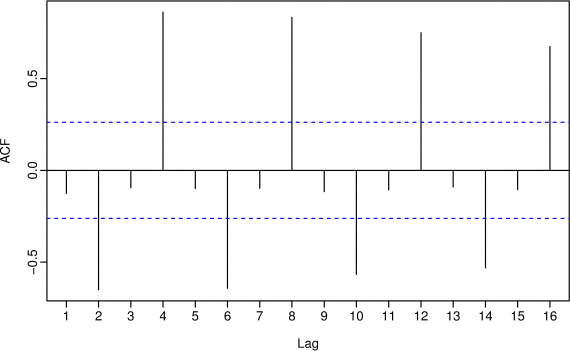

In [1]:
from IPython.display import Image
Image(filename='images/forecasting_acf.png') 

In this graph, $r_4$ is higher than any other lags. This is caused by the seasonal pattern in the data. The peaks tend to be 4 quarters apart and the troughs two quarters apart.

Time series that show no autocorrelation are called **white noise**. For white noise, each autocorrelation value should be close to zero.

### Some simple forecasting methods

#### Average method

The forecasts of all future values are equal to the mean of the historical data. If we let historical data be denoted as $y_1$, ..., $y_T$, then the forecast:

$$ \hat{y}_{T+h|T} = \bar{y} = \frac{(y_1 + ... + y_T)}{T} $$

#### Naïve method

Only appropriate for time series data. All forecasts are simply set to the value of the last observation. 

#### Seasonal naïve method

Same as above, but we set each forecast to be the last observed value for the given season (e.g., the same month of the previous year). 

$ y_{T+h-km} $ where $m$ = seasonal period, $k = \lfloor \frac{h-1}{m} \rfloor +1 $

and $ \lfloor u \rfloor $ denotes the integer part of $u$.

#### Drift method

A variation of the naive method, but allows the forecast to increase/descrease over time, where that amount of change over time (called the **drift**) is set to be the average change seen historically. 

$$ y_T + \frac{h}{T-1} \sum_{t=2}^T (y_t - y_{t-1}) = y_T + h(\frac{y_T - y_1}{T-1}) $$

This is equivalent to drawing a line between the first and last observation, and extrapolating it into the future.

### Transformations and adjustments

We can transform data to make it simpler for forecasting models. These transformations may be in the form of a mathematical transformation, calendar transformation, inflation adjustment, etc.. The hope is that data transformations/adjustments will reduce or remove variation in the data. Simpler patterns generally lead to more accurate forecasts.

#### Box-Cox transformations

These are a family of mathematical transformations that include logarithms and power transformations. They depend on the variable $λ$:

$$
w_t =
\begin{cases}
log(y_t)  & \text{if $λ$ = 0} \\
\frac{y_t^λ - 1}{λ} & \text{otherwise}
\end{cases} 
$$

where $log$ is always the natural logarithm.

A good value of $λ$ is one which makes the size of the seasonal variation about the same across the whole series, as that makes the forecasting model more simple.

When using a transformation, you have to **back-transform** after the forecast is made to obtain the forecast on the original scale.

The reverse Box-Cox transformation is:

$$
y_t =
\begin{cases}
exp(w_t)  & \text{if $λ$ = 0} \\
(λw_t + 1)^{1/λ} & \text{otherwise}
\end{cases} 
$$

### Evaluating forecast accuracy


#### Scale-dependent errors

Let $y_i$ be the $i$th observation and $\hat{y}_i$ denote the forecast of $y_i$. Then, the **forecast error** is simply:

$$ e_i = y_i - \hat{y}_i $$

This is a **scale-dependent** measure. Some other scale-dependent measures include:

Mean absolute error: MAE = mean(|$e_i$|)    
Root mean squared error: RMSE = $sqrt{(mean(e_i^2))}$

#### Percentage errors

The percentage error is given by $p_i = \frac{100e_i}{y_i}$

Percentage errors have the advantage of being **scale-independent**.

The most common measure is:    

Mean absolute percentage error: MAPE = mean(|$p_i$|)

This has the disadvantage of being infinite or undefined if $y_i = 0$ for _any_ $i$ in the period of interest, and having extreme values when any $y_i$ is close to zero.

#### Scaled errors

These error measurements were proposed as an alternative to percentage errors when comparing forecast accuracy across series on different scales.

#### Training and test sets

Just like in many machine learning applications, it's common in time series analysis to use a portion of data as a training set and a portion as a testing set to see how accuracte the forecast may be.

### Residual diagnostics

A **residual** in forecasting is the difference between an observed value and its forecast based on other observations.

A good forecasting model will yield residuals with these properties:
1. The residuals are uncorrelated. If there is correlation, then there is information in the residuals that can be used in the forecast model.
2. The residuals have zero mean. If the mean is not zero, the forecasts are biased.

If the residuals have mean $m$, then add $m$ to all forecasts and the bias problem should be fixed. Fixing correlation will be discussed later.

#### Portmanteau tests for autocorrelation

In addition to ACF plots, a more formal test can be made for autocorrelation by considering a whole set of $r_k$ values as a group.

We can test for whether or not the first $h$ autocorrelations are significantly different from what would be expected from a white noise process. One such portmanteau test is the **Box-Pierce test** based on the following statistic:

$$ Q = T \sum_{k=1}^h r_k^2 $$

where $h$ is the maximum lag being considered and $T$ is the number of observations. If each $r_k$ is close to zero, then $Q$ will be small. If some $r_k$ values are large, then $Q$ will be large.

Use $h = 10$ for non-seasonal data and $h = 2m$ for seasonal data, where $m$ is the period of seasonality.

A related, more accurate test is the **Ljung-Box test**:

$$ Q^* = T(T + 2) \sum_{k=1}^h (T - k)^{-1}r_k^2 $$

Again, large $Q^*$ values suggest the autocorrelations do not come from white noise.

### Prediction intervals

As discussed, a **prediction interval** gives an interval within which we expect $y_i$ to lie with a specified probability. e.g., assuming the forecast errors are uncorrelated and normally distributed, a simple 95% prediction interval is:

$$ \hat{y}_t ± 1.96\hat{σ} $$

where $\hat{σ}$ is an estimate of the standard deviation of the forecast distribution.

## Chapter 3 - Judgmental forecasts

There are many cases where making a forecast on judgement is the only option, such as when there is no past data or during completely new market conditions.

It is important to recognize that judgemental forecasts are subjective and come with limitations.

### The Delphi method

This method relies on the key assumption that forecasts from a group are generally more accurate than those from individuals. The aim here is to construct consensus forecasts from a group of experts in a structured manner.

1. A panel of experts is assembled.
2. Forecasting tasks/challenges are set and distributed to the experts.
3. Experts return initial forecasts and justifications. These are compiled and summarized for feedback.
4. Feedback is provided to the experts who now review their forecasts in light of the feedback.
5. Final forecasts are constructed by aggregating the experts' forecasts.

## Chapter 4 - Simple regression

"Simple" meaning we only allow one predictor variable $x$.

The forecast variable $y$ is sometimes called the **regressand**, the **dependent** or **explained** variable.

The predictor variable $x$ is sometimes also called the **regressor**, the **independent** or **explanatory** variable.

In this chapter, the forecast and predictor variables are assumed to be related by this simple linear model:

$$ y = \beta_0 + \beta_1x + ε $$

$\beta_0$ and $\beta_1$ represent the y-intercept and slope, respectively. 

### Least squares estimation

$\beta_0$ and $\beta_1$ need to be determined to find the proper fit equation. We can do this many ways. 

The least squares principle chooses $\beta_0$ and $\beta_1$ by minimizing the sum of the squared errors.

$$ \hat{\beta_1} = \frac{\sum_{i=1}^N (y_i - \bar{y})(x_i - \bar{x})}{\sum_{i=1}^N (x_i - \bar{x})^2} $$

and

$$ \hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x} $$

where $\bar{x}$ is the average of the $x$ observations and $\bar{y}$ is the average of the $y$ observations. 

The forecasted regression line is $\hat{y} = \hat{\beta_0} + \hat{\beta_1}x$

### Regression and correlation

Recall the correlation coefficient $r$ from earlier.

The slope coefficient can also be expressed as:

$$ \hat{\beta_1} = r\frac{s_y}{s_x} $$

where $s_x$ and $s_y$ are the standard deviations of the $x$ and $y$ observations.

So correlation and regression are strongly linked.

#### Goodness-of-fit

A common way to summarize how well a linear regression model fits the data is via the coefficient of determination or $R^2$. This can be calculated as **the square of the correlation between the observed $y$ values and the predicted $\hat{y}$ values.**

$$ R^2 = \frac{\sum (\hat{y_i} - \bar{y})^2}{\sum (y_i - \bar{y})^2} $$

If the predictors are close to the actual values, $R^2$ is close to 1. If they are unrelated to the actual values, $R^2$ is close to 0.

$R^2$ always lies between 0 and 1.

#### Standard error of the regression

Another measure of how well the model has fitted the data is the standard deviation of the residuals, often known as the **standard error of the regression**:

$$ s_e = \sqrt{\frac{1}{N-2} \sum_{i=1}^N e_i^2} $$

### Forecasting with regression

Forecasts from a simple linear model are obtained using the equation:

$$ \hat{y} = \hat{\beta_0} + \hat{\beta_1}x $$

where $x$ is the value of the predictor for which we require a forecast.

A **forecast interval** (or prediction interval) from this model is given by:

$$ \hat{y} ± 1.96s_e \sqrt{1 + \frac{1}{N} + \frac{(x - \bar{x})^2}{(N - 1)s_x^2}} $$

where $N$ is the total number of observations,    
$\bar{x}$ is the mean of the observed $x$ values,    
$s_x$ is the standard deviation of the observed $x$ values,    
and $s_e$ is the standard error of the regression (listed above)

### Spurious regression

More often than not, time series data are **non-stationary**, meaning the values do not fluctuate around a constant mean or with constant variance.

Regressing non-stationary time series can lead to spurious regressions. 

## Chapter 5 - Multiple regression

Multiple regression involves 1 variable to be forecast and _multiple_ predictor variabls.

The general form for multiple regression is:

$$ y_i = \beta_0 + \beta_1x_{1,i} + \beta_2x_{2,i} + ... +  \beta_kx_{k,i} + e_i $$

where $y_i$ is the variable to be forecast and $x_{1,i}, ..., x_{k,i}$ are the $k$ predictor variables.

The $\beta$ coefficients measure the **marginal effects** of the predictor variables.

As with simple regression, we require the following assumptions about the errors ($e_1, ..., e_N$):

* the errors have mean zero
* the errors are uncorrelated with each other
* the errors are uncorrelated with each predictor $x_{j,i}$

### Adjusted $R^2$

Trying to maximize the $R^2$ value in an attempt to improve forecast accuracy is not a good idea because they don't have a valid correlation.

The adjusted $R^2$ value, called **R-bar-squared** or $\bar{R}^2$:

$$ \bar{R}^2 = 1 - (1 - R^2)\frac{N - 1}{N - k - 1} $$

where $N$ is the number of observations,
and $k$ is the number of predictors.

This is an improvement over $R^2$ as the value will no longer increase with more predictors.

### Akaike's Information Criterion

AIC is a method closely related to traditional cross-validation, defined as:

$$ AIC = N log(\frac{SSE}{N}) + 2(k + 2) $$

where $N$ is the number of observations,
and $k$ is the number of predictors in the model.

The model with the minimum value of the AIC is often the best model for forecasting.

### Schwarz Bayesian Information Criterion

A related measure is BIC:

$$ BIC = N log(\frac{SSE}{N}) + (k+2)log(N) $$

As with AIC, minimizing BIC generally gives the best model.